In this mission, we'll continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - the factors that contribute to happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

You may recall from previous missions that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

**Which of the factors above contribute the most to the happiness score?**

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

- `Series.map()`
- `Series.apply()`
- `DataFrame.applymap()`
- `DataFrame.apply()`
- `pd.melt()`

For teaching purposes, we'll focus just on the 2015 report in this mission.

In [1]:
import pandas as pd
import numpy as np

happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Let's start by renaming some of the columns in happiness2015.

In [2]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

happiness2015.rename(mapping, axis = 1, inplace = True)

Each of the "factor" columns consists of numbers. Each number represents the extent to which each factor contributes to the happiness score. However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. 

Instead, **we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact using the following function**:

In [3]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

### Map and apply methods.

Although pandas provides many built-in functions for common data cleaning tasks, in this case, the tranformation we need to perform is so specific to our data that one doesn't exist. Luckily, pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:

1. `Series.map()` method
2. `Series.apply()` method

Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

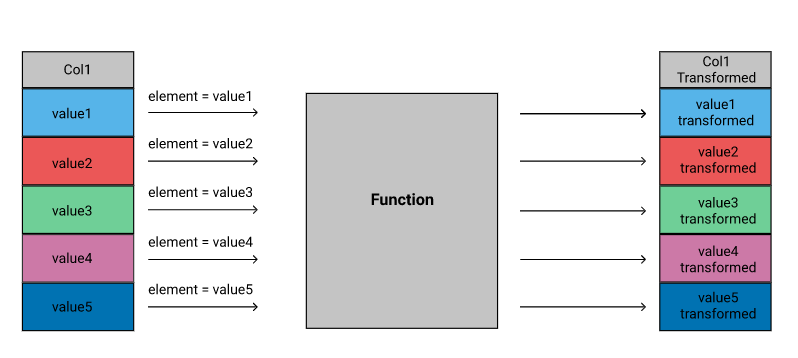

We use the following syntax for both methods:

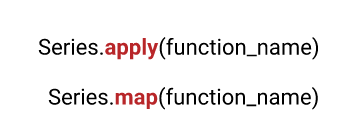

Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called transform, we'd pass it into the apply() method as follows:

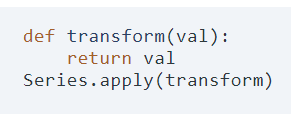

Let's compare the two methods:

In [4]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [5]:
economy_impact_apply = happiness2015['Economy'].apply(label)
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [6]:
economy_impact_map.equals(economy_impact_apply)

True

Note that these methods don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. We recommend creating a new column, in case you need to reference the original values. Let's do that next:

In [7]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

To create the Economy Impact column, map() and apply() iterate through the Economy column and pass each value into the label function. The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.

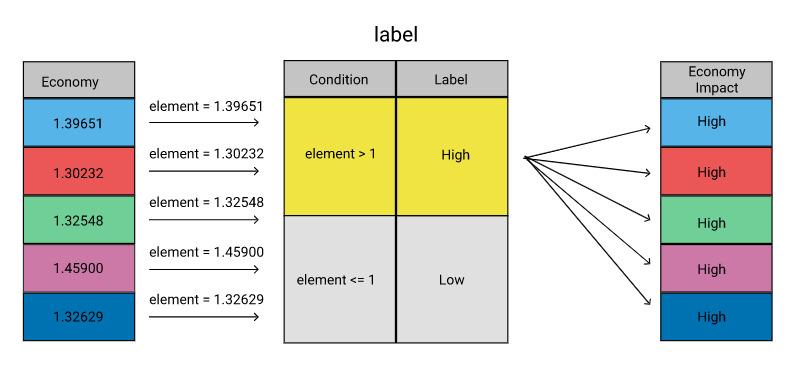

#### Differences...

Since both map and apply can apply functions element-wise to a series, you may be wondering about the difference between them. Let's start by looking at a function with arguments.

In the label function, we arbitrarily split the values into 'High' and 'Low'. What if instead we allowed that number to be passed into the function as an argument?

When we try to apply the function to the Economy column with the map method, we get an error:

In [8]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_map = happiness2015['Economy'].map(label, x = .8)

TypeError: map() got an unexpected keyword argument 'x'

Let's confirm the behavior of the apply method next.

In [9]:
economy_impact_apply = happiness2015['Economy'].apply(label, x = 0.8)

We can only use the Series.apply() method to apply a function with additional arguments element-wise - the Series.map() method will return an error.

So far, we've transformed just one column at a time. If we wanted to transform more than one column, we could use the Series.map() or Series.apply() method to transform them as follows:

In [10]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)

### Applymap method

However, it would be easier to just apply the same function to all of the factor columns (Economy, Health, Family, Freedom, Generosity, Trust) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap() method.

We'll use the following syntax to work with the df.applymap() method:

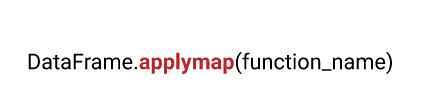

Just like with the Series.map() and Series.apply() methods, we need to pass the function name into the df.applymap() method without parentheses.

In [12]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label)

factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


We can see from the results that, according to our definition, the Economy and Family columns had a high impact on the happiness scores of the first five countries.

Let's summarize what we learned so far:

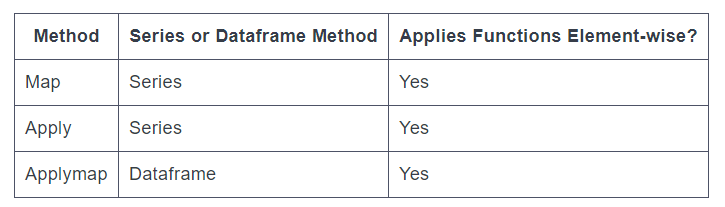

### Apply functions along an axis using the apply method

You can also use the apply() method on a dataframe, but the DataFrame.apply() method has different capabilities. Instead of applying functions element-wise, the df.apply() method applies functions along an axis, either column-wise or row-wise. When we create a function to use with df.apply(), we set it up to accept a series, most commonly a column.

Let's use the df.apply() method to calculate the number of 'High' and 'Low' values in each column of the result from the last exercise, factors_impact. In order to do so, we'll apply the pd.value_counts function to all of the columns in the dataframe:

In [13]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Now, we can easily see that the Family and Economy columns contain the most 'High' values!

When we applied the pd.value_counts function to factors_impact, it calculated the value counts for the first column, Economy, then the second column, Family, so on and so forth:

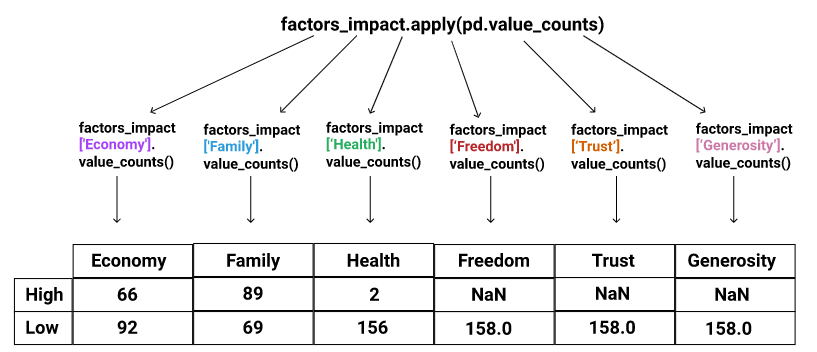

### Warning...

Notice that we used the df.apply() method to transform multiple columns. **This is only possible because the pd.value_counts function operates on a series**. If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error:


In [15]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
happiness2015[factors].apply(label)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
# Another example: 

def v_counts (col):
    num = col.value_counts()
    den = col.size
    return num / den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


#### Rule of thumb...

In general, we should only use the apply() method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the apply() method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the apply() method.

Next, we'll compare two different ways of performing an analysis task. First, we'll use the df.apply() method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.

One thing you probably didn't notice about the factor columns is that the sum of the six factors and the Dystopia Residual column equals the happiness score:

In [18]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 
                                              'Health', 'Freedom', 
                                              'Trust', 'Generosity', 
                                              'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

Let's use the df.apply() method to convert each of the values in the six factor columns and the Dystopia Residual column to percentages.

In [20]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Health Impact,Family Impact,Factors Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,Low,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,Low,High,7.56092
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,Low,High,7.52708
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,Low,High,7.52222
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,Low,High,7.42694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low,Low,Low,3.46504
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low,Low,Low,3.34009
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low,Low,Low,3.00629
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low,Low,Low,2.90454


In [25]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages (col):
    "Receives series as input..."
    div = col / happiness2015['Happiness Score']
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
...,...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447,19.348341
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066,48.900599
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943,10.930805
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706,63.098795


### Reshaping data with the melt function

In the last exercise, we used the df.apply() method to convert the six factor columns and the Dystopia Residual column to percentages.

However, it would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the Dystopia Residual column. We can accomplish this with the pd.melt() function.

To demonstrate this function, let's just work with a subset of happiness2015 called happy_two.

In [27]:
happy_two = happiness2015.loc[0:1, ['Country', 'Happiness Score', 'Economy', 'Family', 'Health']]
happy_two

,Country,Happiness Score,Economy,Family,Health
0,Switzerland,7.587,1.39651,1.34951,0.94143
1,Iceland,7.561,1.30232,1.40223,0.94784


Below, we use the melt function to reshape happy_two so that the values for Economy, Family, and Health reside in the same column:

In [28]:
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


Now, we can use vectorized operations to transform the value column at once!

Here's a summary of the syntax we used to work with the melt function

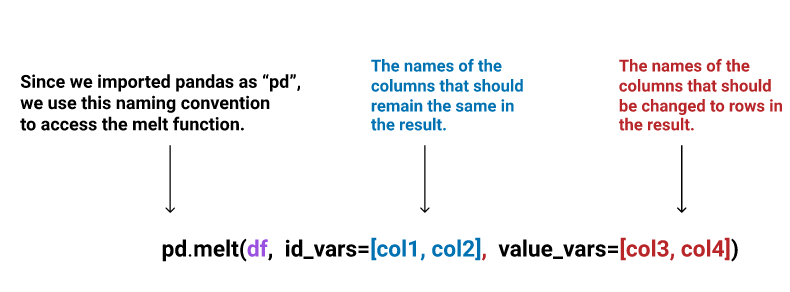

Let's reshape all of happiness2015 with the melt function next.

In [29]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)

melt['Percentage'] = round( melt['value'] / melt['Happiness Score'] * 100, 2)

melt

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


### Challenge: aggregate the data and create a visualization

The melt function moved the values in the seven columns - Economy, Health, Family, Freedom, Generosity, Trust, and Dystopia Residual - to the same column, which meant we could transform them all at once.

You may have also noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as **tidy data**.

Next, let's group the data by the variable column, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the happiness score on average. In the last mission, we combined the 2015, 2016, and 2017 reports, aggregated the data by the Year column using the df.pivot_table() method, and then plotted the results as follows:

In [ ]:
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017])

#Create a pivot table listing the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10))

Let's repeat the same task, but this time, we'll group the data by the variable column instead of the Year column and plot the results using a pie chart

In [36]:
pv_melt = melt.pivot_table(index = 'variable', values = 'value')
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


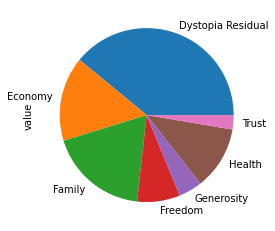

In [37]:
pv_melt.plot(kind = 'pie', y = 'value', legend = False);

### Summary

Below is a summary chart of the differences between the map(), apply(), and applymap() methods:

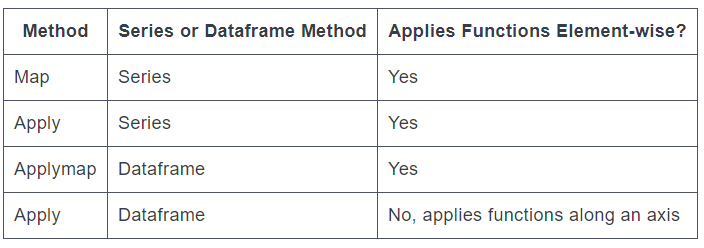

As you explore pandas, you'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the df.pivot() method, not to be confused with the df.pivot_table() method used to aggregate data. Although we couldn't cover the df.pivot() method explicitly in this mission, we encourage you to explore it on your own.

In the next mission, we'll learn how to manipulate strings in pandas as we continue building on what we've learned so far.